**Importing Libraries**

In [ ]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

**Reading Data**

In [ ]:
df_sample=pd.read_csv("/content/sample_data.csv")

In [ ]:
df_train=pd.read_csv("/content/Train_data.csv")
df_label=pd.read_csv("/content/Train_class_labels.csv")
test_data=pd.read_csv("/content/Test_data.csv")

**Concatinating Class Labels with train data**

In [ ]:
train_data=pd.concat([df_train,df_label], axis=1)

In [ ]:
train_data['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

**DATA CLEANING**

**Adding Operating years of pumps as a feature**

1.We are adding total operating years of pumps means to know how old is pump running by subtracting year from date recorded feature with construction year feature.

2.After that we are dropping both features which are date recorded and construction year.

In [ ]:
train_data['date_recorded'] = pd.to_datetime(train_data['date_recorded'])
train_data['operational_year'] = train_data.date_recorded.dt.year - train_data.construction_year

In [ ]:
test_data['date_recorded'] = pd.to_datetime(test_data['date_recorded'])
test_data['operational_year'] = test_data.date_recorded.dt.year - test_data.construction_year

**Replacing Numerical features containing zeros with NAN**

1.We have seen in EDA that more than 90 percent of three numerical features which are amount of total static head, population and gps_height has zero values so we can tackle this problem with some advanced imputation techniques like MICE.

In [ ]:
train_data['amount_tsh']=train_data['amount_tsh'].replace(0,np.nan)
train_data['population']=train_data['population'].replace(0,np.nan)
train_data['gps_height']=train_data['gps_height'].replace(0,np.nan)

**Dropping Features as discusssed in EDA**

In [ ]:
df=train_data.drop(columns=['construction_year','date_recorded','num_private','water_quality','payment_type','quantity_group','waterpoint_type_group','extraction_type_group','source_type','management_group','district_code','num_private','scheme_management','id','subvillage','wpt_name','recorded_by','permit','public_meeting','ward','extraction_type'])

In [ ]:
df_test=test_data.drop(columns=['construction_year','date_recorded','num_private','water_quality','payment_type','quantity_group','waterpoint_type_group','extraction_type_group','source_type','management_group','district_code','num_private','scheme_management','subvillage','wpt_name','recorded_by','permit','public_meeting','ward','extraction_type'])

**Region based median imputation of Longitudes abd Latitudes**

1.We observed that good amount of Longitudes and Latitudes features are corrupted so we will follow median based imputation with respective to their regions so that we cannot miss the range of data.

In [ ]:
long_medians = df.groupby(['region'])['longitude'].transform('median')
lat_medians = df.groupby(['region'])['latitude'].transform('median')
long_medians_test = df_test.groupby(['region'])['longitude'].transform('median')
lat_medians_test = df_test.groupby(['region'])['latitude'].transform('median')
df['latitude']=df['latitude'].fillna(lat_medians)
df['longitude']=df['longitude'].fillna(long_medians)
df_test['latitude']=df_test['latitude'].fillna(lat_medians_test)
df_test['longitude']=df_test['longitude'].fillna(long_medians_test)

**Filling categorical missing values with other**

We will impute simply by other as a category to some categorical features like installer, funder and scheme name

In [ ]:
df['installer']=df['installer'].fillna('other')
df['funder']=df['funder'].fillna('other')
df_test['installer']=df_test['installer'].fillna('other')
df_test['funder']=df_test['funder'].fillna('other')
df['scheme_name']=df['scheme_name'].fillna('other')
df_test['scheme_name']=df_test['scheme_name'].fillna('other')

**Cleaning Categorical Variables**

**Funder**

In [ ]:
df['funder'].value_counts()

Government Of Tanzania    9084
other                     3635
Danida                    3114
Hesawa                    2202
Rwssp                     1374
                          ... 
Rarymond Ekura               1
Justine Marwa                1
Municipal Council            1
Afdp                         1
Samlo                        1
Name: funder, Length: 1898, dtype: int64

In [ ]:
# https://stackoverflow.com/questions/36383821/pandas-dataframe-apply-function-to-column-strings-based-on-other-column-value
df['funder'] = df['funder'] .str.replace(' ','_')
df['funder']= df['funder'] .str.replace('-','_')
df['funder'] = df['funder'].str.replace(' The ','')
df['funder'] = df['funder'].str.replace(' ','')
df['funder'] = df['funder'].str.replace('&','_')
df['funder'] = df['funder'].str.replace(',','_')
df['funder'] = df['funder'] .str.lower()
df['funder'].value_counts()

government_of_tanzania    9084
other                     3635
danida                    3114
hesawa                    2202
rwssp                     1374
                          ... 
rarymond_ekura               1
justine_marwa                1
municipal_council            1
afdp                         1
samlo                        1
Name: funder, Length: 1894, dtype: int64

In [ ]:
# https://stackoverflow.com/questions/36383821/pandas-dataframe-apply-function-to-column-strings-based-on-other-column-value
df_test['funder'] = df_test['funder'] .str.replace(' ','_')
df_test['funder']= df_test['funder'] .str.replace('-','_')
df_test['funder'] = df_test['funder'].str.replace(' The ','')
df_test['funder'] = df_test['funder'].str.replace(' ','')
df_test['funder'] = df_test['funder'].str.replace('&','_')
df_test['funder'] = df_test['funder'].str.replace(',','_')
df_test['funder'] = df_test['funder'] .str.lower()
df_test['funder'].value_counts()

government_of_tanzania    2215
other                      869
danida                     793
hesawa                     580
world_bank                 352
                          ... 
pad                          1
craelius                     1
tanroad                      1
ndanda_missions              1
livin                        1
Name: funder, Length: 980, dtype: int64

**Installer**

In [ ]:
df['installer'].value_counts()

DWE                17402
other               3655
Government          1825
RWE                 1206
Commu               1060
                   ...  
Wizara  ya maji        1
TWESS                  1
Nasan workers          1
R                      1
SELEPTA                1
Name: installer, Length: 2146, dtype: int64

In [ ]:
# https://stackoverflow.com/questions/36383821/pandas-dataframe-apply-function-to-column-strings-based-on-other-column-value
df['installer'] = df['installer'] .str.replace(' ','_')
df['installer']= df['installer'] .str.replace('-','_')
df['installer'] = df['installer'].str.replace(' The ','')
df['installer'] = df['installer'].str.replace(' ','')
df['installer'] = df['installer'].str.replace('&','_')
df['installer'] = df['installer'].str.replace(',','_')
df['installer'] = df['installer'] .str.lower()
df['installer'].value_counts()

dwe                      17405
other                     3655
government                1891
hesawa                    1395
rwe                       1206
                         ...  
sa                           1
luleka                       1
tlc/seleman_mang'ombe        1
tasaf_and_mmem               1
selepta                      1
Name: installer, Length: 1934, dtype: int64

In [ ]:
# https://stackoverflow.com/questions/36383821/pandas-dataframe-apply-function-to-column-strings-based-on-other-column-value
df_test['installer']= df_test['installer'] .str.replace('-','_')
df_test['installer'] = df_test['installer'].str.replace(' ','')
df_test['installer'] = df_test['installer'].str.replace(',','_')
df_test['installer'] = df_test['installer'] .str.lower()
df_test['installer'].value_counts()

dwe                 4351
other                877
government           476
hesawa               373
rwe                  292
                    ... 
consultantanddwe       1
kulwa                  1
waingereza             1
georgehekwe            1
livi                   1
Name: installer, Length: 952, dtype: int64

**Basin**

In [ ]:
df['basin'].value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

In [ ]:
# https://stackoverflow.com/questions/36383821/pandas-dataframe-apply-function-to-column-strings-based-on-other-column-value
df['basin'] = df['basin'].str.replace(' ','')
df['basin'] = df['basin'].str.replace(' ','_')
df['basin'] = df['basin'].str.replace(',','_')
df['basin'] = df['basin'].str.replace('_/_','_')
df['basin'] = df['basin'] .str.lower()
df['basin'].value_counts()

lakevictoria            10248
pangani                  8940
rufiji                   7976
internal                 7785
laketanganyika           6432
wami/ruvu                5987
lakenyasa                5085
ruvuma/southerncoast     4493
lakerukwa                2454
Name: basin, dtype: int64

In [ ]:
# https://stackoverflow.com/questions/36383821/pandas-dataframe-apply-function-to-column-strings-based-on-other-column-value
# https://stackoverflow.com/questions/36383821/pandas-dataframe-apply-function-to-column-strings-based-on-other-column-value
df_test['basin']= df_test['basin'] .str.replace('-','_')
df_test['basin'] = df_test['basin'].str.replace(' The ','')
df_test['basin'] = df_test['basin'].str.replace(' ','')
df_test['basin'] = df_test['basin'].str.replace('&','_')
df_test['basin'] = df_test['basin'].str.replace(',','_')
df_test['basin'] = df_test['basin'] .str.lower()
df_test['basin'].value_counts()

lakevictoria            2623
pangani                 2203
rufiji                  2011
internal                1857
laketanganyika          1620
wami/ruvu               1590
lakenyasa               1247
ruvuma/southerncoast    1094
lakerukwa                605
Name: basin, dtype: int64

**Region**

In [ ]:
df['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [ ]:
df['region'] = df['region'] .str.replace(' ','_')
df['region'] = df['region'] .str.lower()
df['region'].value_counts()

iringa           5294
shinyanga        4982
mbeya            4639
kilimanjaro      4379
morogoro         4006
arusha           3350
kagera           3316
mwanza           3102
kigoma           2816
ruvuma           2640
pwani            2635
tanga            2547
dodoma           2201
singida          2093
mara             1969
tabora           1959
rukwa            1808
mtwara           1730
manyara          1583
lindi            1546
dar_es_salaam     805
Name: region, dtype: int64

In [ ]:
df_test['region'] = df_test['region'] .str.replace(' ','_')
df_test['region'] = df_test['region'] .str.lower()
df_test['region'].value_counts()

shinyanga        1311
iringa           1305
mbeya            1119
kilimanjaro      1115
morogoro         1032
kagera            858
mwanza            795
arusha            761
kigoma            717
pwani             696
ruvuma            666
tanga             639
dodoma            578
tabora            507
mara              482
singida           443
rukwa             434
mtwara            414
manyara           389
lindi             374
dar_es_salaam     215
Name: region, dtype: int64

**LGA**

In [ ]:
df['lga'].value_counts()

Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64

In [ ]:
df['lga'] = df['lga'] .str.replace(' ','_')
df['lga'] = df['lga'] .str.lower()
df['lga'].value_counts()

njombe          2503
arusha_rural    1252
moshi_rural     1251
bariadi         1177
rungwe          1106
                ... 
moshi_urban       79
kigoma_urban      71
arusha_urban      63
lindi_urban       21
nyamagana          1
Name: lga, Length: 125, dtype: int64

In [ ]:
df_test['lga'] = df_test['lga'] .str.replace(' ','_')
df_test['lga'] = df_test['lga'] .str.lower()
df_test['lga'].value_counts()

njombe          625
moshi_rural     315
bariadi         308
rungwe          275
kasulu          275
               ... 
songea_urban     23
tanga            22
arusha_urban     19
lindi_urban       3
nyamagana         1
Name: lga, Length: 125, dtype: int64

**Scheme Name**

In [ ]:
df['scheme_name'].value_counts()

other                      28166
K                            682
None                         644
Borehole                     546
Chalinze wate                405
                           ...  
Visiga water supplly           1
Emanyata pipelines             1
Magundi water supply           1
Imalampaka water supply        1
Mtawanya                       1
Name: scheme_name, Length: 2697, dtype: int64

In [ ]:
df['scheme_name'] = df['scheme_name'] .str.replace(' ','_')
df['scheme_name'] = df['scheme_name'] .str.lower()
df['scheme_name'].value_counts()

other                       28166
k                             685
none                          669
borehole                      546
chalinze_wate                 406
                            ...  
merali_juu_line                 1
izunya                          1
ukuu                            1
nya/mak/buk_piped_scheme        1
mtawanya                        1
Name: scheme_name, Length: 2577, dtype: int64

In [ ]:
df_test['scheme_name'] = df_test['scheme_name'] .str.replace(' ','_')
df_test['scheme_name'] = df_test['scheme_name'] .str.lower()
df_test['scheme_name'].value_counts()

other                         7092
k                              176
none                           159
borehole                       158
danida                         104
                              ... 
kwa_sondro_water_supply          1
us_embassy_borehole_scheme       1
morongo                          1
lutende_scheme                   1
mbwasa_water_supply              1
Name: scheme_name, Length: 1733, dtype: int64

**Extraction Type Class**

In [ ]:
df['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [ ]:
df['extraction_type_class'] = df['extraction_type_class'] .str.replace(' ','_')
df['extraction_type_class'] = df['extraction_type_class'] .str.replace('-','_')
df['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope_pump         451
wind_powered      117
Name: extraction_type_class, dtype: int64

In [ ]:
df_test['extraction_type_class'] = df_test['extraction_type_class'] .str.replace(' ','_')
df_test['extraction_type_class'] = df_test['extraction_type_class'] .str.replace('-','_')
df_test['extraction_type_class'].value_counts()

gravity         6483
handpump        4156
other           1672
submersible     1593
motorpump        790
rope_pump        121
wind_powered      35
Name: extraction_type_class, dtype: int64

**Management**

In [ ]:
df['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [ ]:
df['management'] = df['management'] .str.replace(' ','_')
df['management'] = df['management'] .str.replace('-','')
df['management'] = df['management'] .str.replace('__','')
df['management'].value_counts()

vwc                 40507
wug                  6515
water_board          2933
wua                  2535
private_operator     1971
parastatal           1768
water_authority       904
other                 844
company               685
unknown               561
otherschool            99
trust                  78
Name: management, dtype: int64

In [ ]:
df_test['management'] = df_test['management'] .str.replace(' ','_')
df_test['management'] = df_test['management'] .str.replace('-','')
df_test['management'] = df_test['management'] .str.replace('__','')
df_test['management'].value_counts()

vwc                 10117
wug                  1593
water_board           755
wua                   583
private_operator      533
parastatal            461
other                 239
water_authority       219
company               174
unknown               122
otherschool            27
trust                  27
Name: management, dtype: int64

**Payment**

In [ ]:
df_test['payment'].value_counts()

never pay                6364
pay per bucket           2281
pay monthly              2097
unknown                  1992
pay annually              928
pay when scheme fails     928
other                     260
Name: payment, dtype: int64

In [ ]:
df['payment'] = df['payment'] .str.replace(' ','_')
df['payment'].value_counts()

never_pay                25348
pay_per_bucket            8985
pay_monthly               8300
unknown                   8157
pay_when_scheme_fails     3914
pay_annually              3642
other                     1054
Name: payment, dtype: int64

In [ ]:
df_test['payment'] = df_test['payment'] .str.replace(' ','_')
df_test['payment'].value_counts()

never_pay                6364
pay_per_bucket           2281
pay_monthly              2097
unknown                  1992
pay_annually              928
pay_when_scheme_fails     928
other                     260
Name: payment, dtype: int64

**Quality Group**

In [ ]:
df['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

**Quantity**

In [ ]:
df['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

**Source**

In [ ]:
df['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [ ]:
df['source'] = df['source'] .str.replace(' ','_')
df['source'].value_counts()

spring                  17021
shallow_well            16824
machine_dbh             11075
river                    9612
rainwater_harvesting     2295
hand_dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [ ]:
df_test['source'] = df_test['source'] .str.replace(' ','_')
df_test['source'].value_counts()

shallow_well            4316
spring                  4195
machine_dbh             2747
river                   2352
rainwater_harvesting     568
hand_dtw                 234
lake                     185
dam                      184
other                     49
unknown                   20
Name: source, dtype: int64

**Source Class**

In [ ]:
df['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

**Water Point Type**

In [ ]:
df['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [ ]:
df['waterpoint_type'] = df['waterpoint_type'] .str.replace(' ','_')
df['waterpoint_type'].value_counts()

communal_standpipe             28522
hand_pump                      17488
other                           6380
communal_standpipe_multiple     6103
improved_spring                  784
cattle_trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [ ]:
df_test['waterpoint_type'] = df_test['waterpoint_type'] .str.replace(' ','_')
df_test['waterpoint_type'].value_counts()

communal_standpipe             7106
hand_pump                      4396
other                          1630
communal_standpipe_multiple    1508
improved_spring                 175
cattle_trough                    34
dam                               1
Name: waterpoint_type, dtype: int64

**Train_test_split**

In [ ]:
y = df['status_group'].values
X = df.drop(['status_group'], axis=1)
X.head(1)

amount_tsh funder  gps_height installer  longitude  latitude      basin  \
0      6000.0  roman      1390.0     roman  34.938093 -9.856322  lakenyasa   

   region  region_code     lga  ...  scheme_name extraction_type_class  \
0  iringa           11  ludewa  ...        roman               gravity   

  management       payment quality_group quantity  source source_class  \
0        vwc  pay_annually          good   enough  spring  groundwater   

      waterpoint_type operational_year  
0  communal_standpipe               12  

[1 rows x 21 columns]

In [ ]:
y = train_data['status_group'].values
X = train_data.drop(['status_group'], axis=1)
X.head(1)

id  amount_tsh date_recorded funder  gps_height installer  longitude  \
0  69572      6000.0    2011-03-14  Roman        1390     Roman  34.938093   

   latitude wpt_name  num_private  ... water_quality quality_group quantity  \
0 -9.856322     none            0  ...          soft          good   enough   

   quantity_group  source source_type source_class     waterpoint_type  \
0          enough  spring      spring  groundwater  communal standpipe   

  waterpoint_type_group     id  
0    communal standpipe  69572  

[1 rows x 41 columns]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)
print("Split ratio")
print('-'*50)
print('Train dataset:',len(X_train)/len(X)*100,'%\n','size:',len(X_train))
print('Test dataset:',len(X_test)/len(X)*100,'%\n','size:',len(X_test))

Split ratio
--------------------------------------------------
Train dataset: 80.0 %
 size: 47520
Test dataset: 20.0 %
 size: 11880


**Mice Imputation**

Mice imputation is a model based imputation which uses linear regression to fill the missing values 

In [ ]:
from sklearn import preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

In [ ]:
X_train_mice = X_train.filter(['amount_tsh','gps_height','population'], axis=1).copy()
# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None,random_state=42)
pickle.dump(mice_imputer,open('mice_imputer.pkl','wb'))
X_train_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(X_train_mice), columns=X_train_mice.columns)

In [ ]:
X_test_mice = X_test.filter(['amount_tsh','gps_height','population'], axis=1).copy()
# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None,random_state=42)
X_test_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(X_test_mice), columns=X_test_mice.columns)

In [ ]:
X_train['amount_tsh']=X_train_mice_imputed['amount_tsh'].values
X_train['gps_height']=X_train_mice_imputed['gps_height'].values
X_train['population']=X_train_mice_imputed['population'].values
X_test['amount_tsh']=X_test_mice_imputed['amount_tsh'].values
X_test['gps_height']=X_test_mice_imputed['gps_height'].values
X_test['population']=X_test_mice_imputed['population'].values

**Feature Engineering**

In feature engineering we will try two techniques to vectorize our data one is one hot encoding since is number of categories are too high we may have large dimensional vector so it will take lot of time when we train tree based models so in order to compensate that we will try target encoding.

**One hot Encoding**

####https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder
####https://datascience.stackexchange.com/questions/18956/different-number-of-features-in-train-vs-test

In [ ]:
# Always perform following step on training records
funder_onehot = OneHotEncoder(handle_unknown='ignore')
funder_arr = funder_onehot.fit_transform(X_train.loc[:, ['funder']]).toarray()

# Save this onehot encoding object for reuse purpose
with open('funder.pkl', 'wb') as f:
    pickle.dump(funder_onehot, f)
print(funder_arr.shape)
# Load it before using it & same thing we do we when use in production/testing environment
with open('funder.pkl', 'rb') as f:
    funder_onehot = pickle.load(f)
funder_arr_test = funder_onehot.transform(X_test.loc[:, ['funder']]).toarray()
funder_arr_test_sumbmission = funder_onehot.transform(df_test.loc[:, ['funder']]).toarray()
print(funder_arr_test.shape)
print(funder_arr_test_sumbmission.shape)

(47520, 1715)
(11880, 1715)
(14850, 1715)


In [ ]:
# Always perform following step on training records
installer_onehot = OneHotEncoder(handle_unknown='ignore')
intaller_arr = installer_onehot.fit_transform(X_train.loc[:, ['installer']]).toarray()

# Save this onehot encoding object for reuse purpose
with open('installer.pkl', 'wb') as f:
    pickle.dump(installer_onehot, f)
print(intaller_arr.shape)
# Load it before using it & same thing we do we when use in production/testing environment
with open('installer.pkl', 'rb') as f:
    installer_onehot = pickle.load(f)
installer_arr_test = installer_onehot.transform(X_test.loc[:, ['installer']]).toarray()
installer_arr_test_submission = installer_onehot.transform(df_test.loc[:, ['installer']]).toarray()
print(installer_arr_test.shape)
print(installer_arr_test_submission.shape)

(47520, 1738)
(11880, 1738)
(14850, 1738)


In [ ]:
# Always perform following step on training records
basin_onehot = OneHotEncoder(handle_unknown='ignore')
basin_arr = basin_onehot.fit_transform(X_train.loc[:, ['basin']]).toarray()

# Save this onehot encoding object for reuse purpose
with open('basin.pkl', 'wb') as f:
    pickle.dump(basin_onehot, f)
print(basin_arr.shape)
# Load it before using it & same thing we do we when use in production/testing environment
with open('basin.pkl', 'rb') as f:
    basin_onehot = pickle.load(f)
basin_arr_test = basin_onehot.transform(X_test.loc[:, ['basin']]).toarray()
basin_arr_test_submission = basin_onehot.transform(df_test.loc[:, ['basin']]).toarray()
print(basin_arr_test.shape)
print(basin_arr_test_submission.shape)

(47520, 9)
(11880, 9)
(14850, 9)


In [ ]:
# Always perform following step on training records
region_onehot = OneHotEncoder(handle_unknown='ignore')
region_arr = region_onehot.fit_transform(X_train.loc[:, ['region']]).toarray()

# Save this onehot encoding object for reuse purpose
with open('region.pkl', 'wb') as f:
    pickle.dump(region_onehot, f)
print(region_arr.shape)
# Load it before using it & same thing we do we when use in production/testing environment
with open('region.pkl', 'rb') as f:
    region_onehot = pickle.load(f)
region_arr_test = region_onehot.transform(X_test.loc[:, ['region']]).toarray()
region_arr_test_submission = region_onehot.transform(df_test.loc[:, ['region']]).toarray()
print(region_arr_test.shape)
print(region_arr_test_submission.shape)

(47520, 21)
(11880, 21)
(14850, 21)


In [ ]:
# Always perform following step on training records
lga_onehot = OneHotEncoder(handle_unknown='ignore')
lga_arr = lga_onehot.fit_transform(X_train.loc[:, ['lga']]).toarray()

# Save this onehot encoding object for reuse purpose
with open('lga.pkl', 'wb') as f:
    pickle.dump(lga_onehot, f)
print(lga_arr.shape)
# Load it before using it & same thing we do we when use in production/testing environment
with open('lga.pkl', 'rb') as f:
    lga_onehot = pickle.load(f)
lga_arr_test = lga_onehot.transform(X_test.loc[:, ['lga']]).toarray()
lga_arr_test_submission = lga_onehot.transform(df_test.loc[:, ['lga']]).toarray()
print(lga_arr_test.shape)
print(lga_arr_test_submission.shape)

(47520, 124)
(11880, 124)
(14850, 124)


In [ ]:
# Always perform following step on training records
scheme_name_onehot = OneHotEncoder(handle_unknown='ignore')
scheme_name_arr = scheme_name_onehot.fit_transform(X_train.loc[:, ['scheme_name']]).toarray()

# Save this onehot encoding object for reuse purpose
with open('scheme_name.pkl', 'wb') as f:
    pickle.dump(scheme_name_onehot, f)
print(scheme_name_arr.shape)
# Load it before using it & same thing we do we when use in production/testing environment
with open('scheme_name.pkl', 'rb') as f:
    scheme_name_onehot = pickle.load(f)
scheme_name_arr_test = scheme_name_onehot.transform(X_test.loc[:, ['scheme_name']]).toarray()
scheme_name_arr_test_submission = scheme_name_onehot.transform(df_test.loc[:, ['scheme_name']]).toarray()
print(scheme_name_arr_test.shape)
print(scheme_name_arr_test_submission.shape)

(47520, 2440)
(11880, 2440)
(14850, 2440)


In [ ]:
# Always perform following step on training records
extraction_type_class_onehot = OneHotEncoder(handle_unknown='ignore')
extraction_type_class_arr = extraction_type_class_onehot.fit_transform(X_train.loc[:, ['extraction_type_class']]).toarray()

# Save this onehot encoding object for reuse purpose
with open('extraction_type_class.pkl', 'wb') as f:
    pickle.dump(extraction_type_class_onehot, f)
print(extraction_type_class_arr.shape)
# Load it before using it & same thing we do we when use in production/testing environment
with open('extraction_type_class.pkl', 'rb') as f:
    extraction_type_class_onehot = pickle.load(f)
extraction_type_class_arr_test = extraction_type_class_onehot.transform(X_test.loc[:, ['extraction_type_class']]).toarray()
extraction_type_class_arr_test_submission = extraction_type_class_onehot.transform(df_test.loc[:, ['extraction_type_class']]).toarray()
print(extraction_type_class_arr_test.shape)
print(extraction_type_class_arr_test_submission.shape)

(47520, 7)
(11880, 7)
(14850, 7)


In [ ]:
# Always perform following step on training records
management_onehot = OneHotEncoder(handle_unknown='ignore')
management_arr = management_onehot.fit_transform(X_train.loc[:, ['management']]).toarray()

# Save this onehot encoding object for reuse purpose
with open('management.pkl', 'wb') as f:
    pickle.dump(management_onehot, f)
print(management_arr.shape)
# Load it before using it & same thing we do we when use in production/testing environment
with open('management.pkl', 'rb') as f:
    extraction_type_class_onehot = pickle.load(f)
management_arr_test = management_onehot.transform(X_test.loc[:, ['management']]).toarray()
management_arr_test_submission = management_onehot.transform(df_test.loc[:, ['management']]).toarray()
print(management_arr_test.shape)
print(management_arr_test_submission.shape)

(47520, 12)
(11880, 12)
(14850, 12)


In [ ]:
# Always perform following step on training records
payment_onehot = OneHotEncoder(handle_unknown='ignore')
payment_arr = payment_onehot.fit_transform(X_train.loc[:, ['payment']]).toarray()

# Save this onehot encoding object for reuse purpose
with open('payment.pkl', 'wb') as f:
    pickle.dump(payment_onehot, f)
print(payment_arr.shape)
# Load it before using it & same thing we do we when use in production/testing environment
with open('payment.pkl', 'rb') as f:
    payment_onehot = pickle.load(f)
payment_test = payment_onehot.transform(X_test.loc[:, ['payment']]).toarray()
payment_test_submission = payment_onehot.transform(df_test.loc[:, ['payment']]).toarray()
print(payment_test.shape)
print(payment_test_submission.shape)

(47520, 7)
(11880, 7)
(14850, 7)


In [ ]:
# Always perform following step on training records
quality_group_onehot = OneHotEncoder(handle_unknown='ignore')
quality_group_arr = quality_group_onehot.fit_transform(X_train.loc[:, ['quality_group']]).toarray()

# Save this onehot encoding object for reuse purpose
with open('quality_group.pkl', 'wb') as f:
    pickle.dump(quality_group_onehot, f)
print(quality_group_arr.shape)
# Load it before using it & same thing we do we when use in production/testing environment
with open('quality_group.pkl', 'rb') as f:
    quality_group_onehot = pickle.load(f)
quality_group_test = quality_group_onehot.transform(X_test.loc[:, ['quality_group']]).toarray()
quality_group_test_submission = quality_group_onehot.transform(df_test.loc[:, ['quality_group']]).toarray()
print(quality_group_test.shape)
print(quality_group_test_submission.shape)

(47520, 6)
(11880, 6)
(14850, 6)


In [ ]:
# Always perform following step on training records
quantity_onehot = OneHotEncoder(handle_unknown='ignore')
quantity_arr = quantity_onehot.fit_transform(X_train.loc[:, ['quantity']]).toarray()

# Save this onehot encoding object for reuse purpose
with open('quantity.pkl', 'wb') as f:
    pickle.dump(quantity_onehot, f)
print(quantity_arr.shape)
# Load it before using it & same thing we do we when use in production/testing environment
with open('quantity.pkl', 'rb') as f:
    quantity_onehot = pickle.load(f)
quantity_test = quantity_onehot.transform(X_test.loc[:, ['quantity']]).toarray()
quantity_test_submission = quantity_onehot.transform(df_test.loc[:, ['quantity']]).toarray()
print(quantity_test.shape)
print(quantity_test_submission.shape)

(47520, 5)
(11880, 5)
(14850, 5)


In [ ]:
# Always perform following step on training records
source_onehot = OneHotEncoder(handle_unknown='ignore')
source_arr = source_onehot.fit_transform(X_train.loc[:, ['source']]).toarray()

# Save this onehot encoding object for reuse purpose
with open('source.pkl', 'wb') as f:
    pickle.dump(source_onehot, f)
print(source_arr.shape)
# Load it before using it & same thing we do we when use in production/testing environment
with open('source.pkl', 'rb') as f:
    source_onehot = pickle.load(f)
source_test = source_onehot.transform(X_test.loc[:, ['source']]).toarray()
source_test_submission = source_onehot.transform(df_test.loc[:, ['source']]).toarray()
print(source_test.shape)
print(source_test_submission.shape)

(47520, 10)
(11880, 10)
(14850, 10)


In [ ]:
# Always perform following step on training records
source_class_onehot = OneHotEncoder(handle_unknown='ignore')
source_class_arr = source_class_onehot.fit_transform(X_train.loc[:, ['source_class']]).toarray()

# Save this onehot encoding object for reuse purpose
with open('source_class.pkl', 'wb') as f:
    pickle.dump(source_class_onehot, f)
print(source_class_arr.shape)
# Load it before using it & same thing we do we when use in production/testing environment
with open('source_class.pkl', 'rb') as f:
    source_class_onehot = pickle.load(f)
source_class_test = source_class_onehot.transform(X_test.loc[:, ['source_class']]).toarray()
source_class_test_submission = source_class_onehot.transform(df_test.loc[:, ['source_class']]).toarray()
print(source_class_test.shape)
print(source_class_test_submission.shape)

(47520, 3)
(11880, 3)
(14850, 3)


In [ ]:
# Always perform following step on training records
waterpoint_type_onehot = OneHotEncoder(handle_unknown='ignore')
waterpoint_type_arr = waterpoint_type_onehot.fit_transform(X_train.loc[:, ['waterpoint_type']]).toarray()

# Save this onehot encoding object for reuse purpose
with open('waterpoint_type.pkl', 'wb') as f:
    pickle.dump(waterpoint_type_onehot, f)
print(waterpoint_type_arr.shape)
# Load it before using it & same thing we do we when use in production/testing environment
with open('waterpoint_type.pkl', 'rb') as f:
    waterpoint_type_onehot = pickle.load(f)
waterpoint_type_test = waterpoint_type_onehot.transform(X_test.loc[:, ['waterpoint_type']]).toarray()
waterpoint_type_test_submission = waterpoint_type_onehot.transform(df_test.loc[:, ['waterpoint_type']]).toarray()
print(waterpoint_type_test.shape)
print(waterpoint_type_test_submission.shape)

(47520, 7)
(11880, 7)
(14850, 7)


**Numrerical Features**

In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['latitude'].values.reshape(-1,1))
X_train_latitude_norm = normalizer.transform(X_train['latitude'].values.reshape(-1,1))
X_test_latitude_norm = normalizer.transform(X_test['latitude'].values.reshape(-1,1))
X_test_latitude_norm_submisssion = normalizer.transform(df_test['latitude'].values.reshape(-1,1))
print("After vectorizations")
print(X_train_latitude_norm.shape, y_train.shape)
print(X_test_latitude_norm.shape, y_test.shape)
print(X_test_latitude_norm_submisssion.shape, y_test.shape)
print("="*100)

After vectorizations
(47520, 1) (47520,)
(11880, 1) (11880,)
(14850, 1) (11880,)


In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['longitude'].values.reshape(-1,1))
X_train_longitude_norm = normalizer.transform(X_train['longitude'].values.reshape(-1,1))
X_test_longitude_norm = normalizer.transform(X_test['longitude'].values.reshape(-1,1))
X_test_longitude_norm_submisssion = normalizer.transform(df_test['longitude'].values.reshape(-1,1))
print("After vectorizations")
print(X_train_longitude_norm.shape, y_train.shape)
print(X_test_longitude_norm.shape, y_test.shape)
print(X_test_longitude_norm_submisssion.shape, y_test.shape)
print("="*100)

After vectorizations
(47520, 1) (47520,)
(11880, 1) (11880,)
(14850, 1) (11880,)


In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['gps_height'].values.reshape(-1,1))
X_train_gps_height_norm = normalizer.transform(X_train['gps_height'].values.reshape(-1,1))
X_test_gps_height_norm = normalizer.transform(X_test['gps_height'].values.reshape(-1,1))
X_test_gps_height_norm_submisssion = normalizer.transform(df_test['gps_height'].values.reshape(-1,1))
print("After vectorizations")
print(X_train_gps_height_norm.shape, y_train.shape)
print(X_test_gps_height_norm.shape, y_test.shape)
print(X_test_gps_height_norm_submisssion.shape, y_test.shape)
print("="*100)

After vectorizations
(47520, 1) (47520,)
(11880, 1) (11880,)
(14850, 1) (11880,)


In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['operational_year'].values.reshape(-1,1))
X_train_operational_year_norm = normalizer.transform(X_train['operational_year'].values.reshape(-1,1))
X_test_operational_year_norm = normalizer.transform(X_test['operational_year'].values.reshape(-1,1))
X_test_operational_year_norm_submission = normalizer.transform(df_test['operational_year'].values.reshape(-1,1))
print("After vectorizations")

print(X_train_gps_height_norm.shape, y_train.shape)
print(X_test_gps_height_norm.shape, y_test.shape)
print(X_test_operational_year_norm_submission.shape, y_test.shape)
print("="*100)

After vectorizations
(47520, 1) (47520,)
(11880, 1) (11880,)
(14850, 1) (11880,)


In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['amount_tsh'].values.reshape(-1,1))
X_train_amount_tsh_norm = normalizer.transform(X_train['amount_tsh'].values.reshape(-1,1))
X_test_amount_tsh_norm = normalizer.transform(X_test['amount_tsh'].values.reshape(-1,1))
X_test_amount_tsh_norm_submission = normalizer.transform(df_test['amount_tsh'].values.reshape(-1,1))
print("After vectorizations")
print(X_train_amount_tsh_norm.shape, y_train.shape)
print(X_test_amount_tsh_norm.shape, y_test.shape)
print(X_test_amount_tsh_norm_submission.shape, y_test.shape)
print("="*100)

After vectorizations
(47520, 1) (47520,)
(11880, 1) (11880,)
(14850, 1) (11880,)


In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['population'].values.reshape(-1,1))
X_train_population_norm = normalizer.transform(X_train['population'].values.reshape(-1,1))
X_test_population_norm = normalizer.transform(X_test['population'].values.reshape(-1,1))
X_test_population_norm_submission = normalizer.transform(df_test['population'].values.reshape(-1,1))
print("After vectorizations")
print(X_train_population_norm.shape, y_train.shape)
print(X_test_population_norm.shape, y_test.shape)
print(X_test_population_norm_submission.shape, y_test.shape)
print("="*100)

After vectorizations
(47520, 1) (47520,)
(11880, 1) (11880,)
(14850, 1) (11880,)


In [ ]:
from scipy.sparse import csr_matrix
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html

In [ ]:
X_funder_arr=csr_matrix(funder_arr)
X_funder_arr_test=csr_matrix(funder_arr_test_sumbmission)
X_installer_arr=csr_matrix(intaller_arr)
X_installer_arr_test=csr_matrix(installer_arr_test_submission)
X_basin_arr=csr_matrix(basin_arr)
X_basin_arr_test=csr_matrix(basin_arr_test_submission)
X_region_arr=csr_matrix(region_arr)
X_region_arr_test=csr_matrix(region_arr_test_submission)
X_lga_arr=csr_matrix(lga_arr)
X_lga_arr_test=csr_matrix(lga_arr_test_submission)
X_scheme_name_arr=csr_matrix(scheme_name_arr)
X_scheme_name_arr_test=csr_matrix(scheme_name_arr_test_submission)
X_extraction_type_class_arr=csr_matrix(extraction_type_class_arr)
X_extraction_type_class_arr_test=csr_matrix(extraction_type_class_arr_test_submission)
X_management_arr=csr_matrix(management_arr)
X_management_arr_test=csr_matrix(management_arr_test_submission)
X_payment_arr=csr_matrix(payment_arr)
X_payment_arr_test=csr_matrix(payment_test_submission)
X_quality_group_arr=csr_matrix(quality_group_arr)
X_quality_group_arr_test=csr_matrix(quality_group_test_submission)
X_quantity_arr=csr_matrix(quantity_arr)
X_quantity_arr_test=csr_matrix(quantity_test_submission)
X_source_arr=csr_matrix(source_arr)
X_source_arr_test=csr_matrix(source_test_submission)
X_source_class_arr=csr_matrix(source_class_arr)
X_source_class_arr_test=csr_matrix(source_class_test_submission)
X_waterpoint_type_arr=csr_matrix(waterpoint_type_arr)
X_waterpoint_type_arr_test=csr_matrix(waterpoint_type_test_submission)

In [ ]:
X_funder_arr_te=csr_matrix(funder_arr_test)
X_installer_arr_te=csr_matrix(installer_arr_test)
X_basin_arr_te=csr_matrix(basin_arr_test)
X_region_arr_te=csr_matrix(region_arr_test)
X_lga_arr_te=csr_matrix(lga_arr_test)
X_scheme_name_arr_te=csr_matrix(scheme_name_arr_test)
X_extraction_type_class_arr_te=csr_matrix(extraction_type_class_arr_test)
X_management_arr_te=csr_matrix(management_arr_test)
X_payment_arr_te=csr_matrix(payment_test)
X_quality_group_arr_te=csr_matrix(quality_group_test)
X_quantity_arr_te=csr_matrix(quantity_test)
X_source_arr_te=csr_matrix(source_test)
X_source_class_arr_te=csr_matrix(source_class_test)
X_waterpoint_type_arr_te=csr_matrix(waterpoint_type_test)

**Horizontal Stack**

In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_ohe = hstack((X_funder_arr,X_installer_arr,X_basin_arr,X_region_arr,X_lga_arr,X_scheme_name_arr,X_extraction_type_class_arr,X_management_arr,X_payment_arr,X_quality_group_arr,X_quantity_arr,X_source_arr,X_source_class_arr,X_waterpoint_type_arr,X_train_gps_height_norm,X_train_operational_year_norm,X_train_amount_tsh_norm,X_train_population_norm,X_train_latitude_norm,X_train_longitude_norm)).tocsr()
X_te_ohe = hstack((X_funder_arr_te,X_installer_arr_te,X_basin_arr_te,X_region_arr_te,X_lga_arr_te,X_scheme_name_arr_te,X_extraction_type_class_arr_te,X_management_arr_te,X_payment_arr_te,X_quality_group_arr_te,X_quantity_arr_te,X_source_arr_te,X_source_class_arr_te,X_waterpoint_type_arr_te,X_test_gps_height_norm,X_test_operational_year_norm,X_test_amount_tsh_norm,X_test_population_norm,X_test_latitude_norm,X_test_longitude_norm)).tocsr()
X_te_ohe_submission = hstack((X_funder_arr_test,X_installer_arr_test,X_basin_arr_test,X_region_arr_test,X_lga_arr_test,X_scheme_name_arr_test,X_extraction_type_class_arr_test,X_management_arr_test,X_payment_arr_test,X_quality_group_arr_test,X_quantity_arr_test,X_source_arr_test,X_source_class_arr_test,X_waterpoint_type_arr_test,X_test_gps_height_norm_submisssion,X_test_operational_year_norm_submission,X_test_amount_tsh_norm_submission,X_test_population_norm_submission,X_test_latitude_norm_submisssion,X_test_longitude_norm_submisssion)).tocsr()
print("Final Data matrix")
print(X_tr_ohe.shape, y_train.shape)
print(X_te_ohe.shape, y_test.shape)
print(X_te_ohe_submission.shape, df_test.shape)
print("="*100)

Final Data matrix
(47520, 6110) (47520,)
(11880, 6110) (11880,)
(14850, 6110) (14850, 22)


**Grid Search with baseline models**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

**Logistic Regression with one hot encoding**

In [ ]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='log', n_jobs=-1, random_state = 42)
alpha = [0.0001 , 0.001 , 0.01, 0.1 , 1, 10 , 100]
params = {'alpha' : alpha}
clf = GridSearchCV(clf, params, cv= 3, scoring='f1_micro',verbose=1,return_train_score=True)
clf.fit(X_tr_ohe, y_train)
clf.best_params_

Fitting 3 folds for each of 7 candidates, totalling 21 fits


{'alpha': 0.0001}

In [ ]:
# instantiate the model (using the default parameters)
model = SGDClassifier(loss='log',random_state=42,alpha=0.0001)
# fit the model with data
model.fit(X_tr_ohe, y_train)
y_pred = model.predict(X_te_ohe)
f1_score(y_test, y_pred, average='micro')

0.7692760942760942

In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix= metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[5977   72  403]
 [ 608  154  101]
 [1516   41 3008]]


In [ ]:
cm_df = pd.DataFrame(cnf_matrix,index= ['Functional','Non_Functional','Repair'],columns = ['Functional','Non_Functional','Repair'])

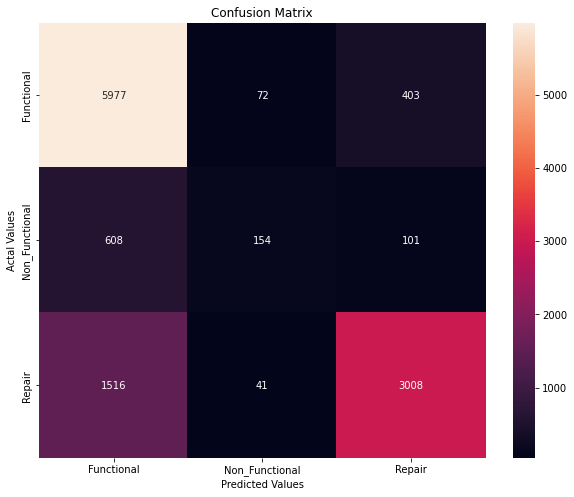

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
params = {'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10, 100,500]}
clf1 = GridSearchCV(DT, params, cv= 3, scoring='f1_micro',verbose=1,return_train_score=True,n_jobs=-1)
clf1.fit(X_tr_ohe, y_train)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='f1_micro', verbose=1)

In [ ]:
clf1.best_params_

{'max_depth': 50, 'min_samples_split': 10}

In [ ]:
model=DecisionTreeClassifier(max_depth=50,min_samples_split=10)
model.fit(X_tr_ohe, y_train)
y_pred = model.predict(X_te_ohe)
f1_score(y_test, y_pred, average='micro')

0.786952861952862

In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix= metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[5807  168  477]
 [ 485  266  112]
 [1193   96 3276]]


In [ ]:
cm_df = pd.DataFrame(cnf_matrix,index= ['Functional','Non_Functional','Repair'],columns = ['Functional','Non_Functional','Repair'])

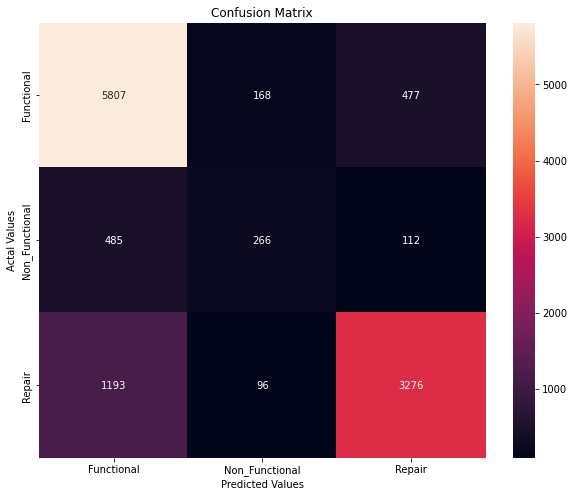

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

**Random Forest Classifier with one hot encoding**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(bootstrap=True)
params = {'n_estimators': [10, 50, 100,200], 'min_samples_split': [5, 10, 100],'max_depth':[10,20,50,100]}
clf1 = GridSearchCV(RF, params, cv= 2, scoring='f1_micro',verbose=1,return_train_score=True,n_jobs=-1)
clf1.fit(X_tr_ohe, y_train)

Fitting 2 folds for each of 48 candidates, totalling 96 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 50, 100],
                         'min_samples_split': [5, 10, 100],
                         'n_estimators': [10, 50, 100, 200]},
             return_train_score=True, scoring='f1_micro', verbose=1)

In [ ]:
clf1.best_params_

{'max_depth': 100, 'min_samples_split': 10, 'n_estimators': 100}

In [ ]:
model=RandomForestClassifier(min_samples_split=10,n_estimators=100,max_depth=100)
model.fit(X_tr_ohe, y_train)
y_pred = model.predict(X_te_ohe)

In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix= metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[5801  106  545]
 [ 498  235  130]
 [1056   50 3459]]


In [ ]:
f1_score(y_test, y_pred, average='micro')

0.7992424242424242

In [ ]:
cm_df = pd.DataFrame(cnf_matrix,index= ['Functional','Non_Functional','Repair'],columns = ['Functional','Non_Functional','Repair'])

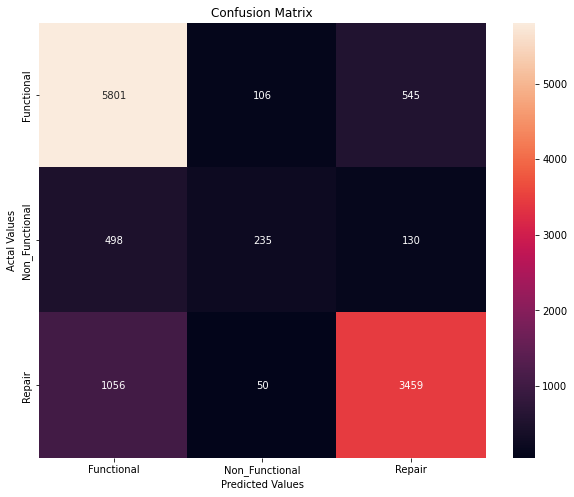

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

**Boosting-LGBM**

In [ ]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
params = {'n_estimators': [50,100,200,500],'max_depth':[10,20,50,100],'num_leaves':[10,20,30,40]}
clf = GridSearchCV(lgbm, params, cv= 2, scoring='f1_micro',verbose=1,return_train_score=True,n_jobs=-1)
clf.fit(X_tr_ohe, y_train)

Fitting 2 folds for each of 64 candidates, totalling 128 fits


GridSearchCV(cv=2, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 50, 100],
                         'n_estimators': [50, 100, 200, 500],
                         'num_leaves': [10, 20, 30, 40]},
             return_train_score=True, scoring='f1_micro', verbose=1)

In [ ]:
clf.best_params_

{'max_depth': 20, 'n_estimators': 500, 'num_leaves': 40}

In [ ]:
model=LGBMClassifier(max_depth=20,n_estimators=500,num_leaves=40)
model.fit(X_tr_ohe, y_train)
y_pred = model.predict(X_te_ohe)

In [ ]:
f1_score(y_test, y_pred, average='micro')

0.788973063973064

In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix= metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[5831   94  527]
 [ 527  206  130]
 [1182   47 3336]]


In [ ]:
cm_df = pd.DataFrame(cnf_matrix,index= ['Functional','Non_Functional','Repair'],columns = ['Functional','Non_Functional','Repair'])

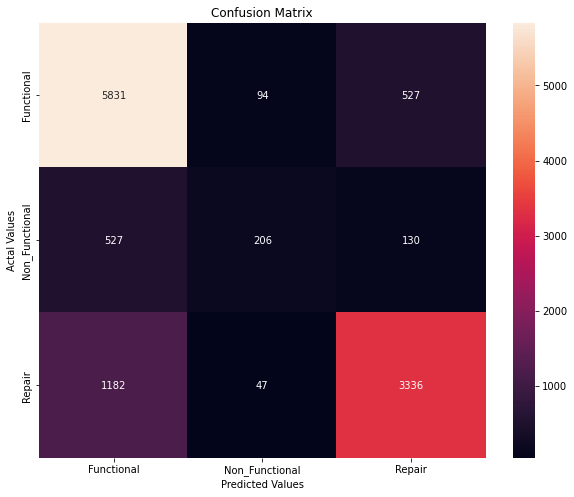

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

**Target Encoding+Auto_Encoder_features**

1.Target encoding is the the numerical representation corresponds to the posterior probability of the target, conditioned by the value of the categorical attribute.

2.In binary problem the target is either 0 or 1. Then, the probability estimate for a category within a categorical variable can be given by Empirical Bayesian probability, P(Y=1|X=Xi).


####https://towardsdatascience.com/all-about-target-encoding-d356c4e9e82

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 713 kB/s 


In [ ]:
import category_encoders as ce

First we need to convert class labels in to numerical form so we are using ordinal encoding 

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
y_train=enc.fit_transform(y_train.reshape(-1,1))
y_test=enc.fit_transform(y_test.reshape(-1,1))

Dropping numerical features as we are target encoding categorical features

In [ ]:
X_train_cat=X_train.drop(columns=['amount_tsh','population','gps_height','longitude','latitude','operational_year'])
X_test_cat=X_test.drop(columns=['amount_tsh','population','gps_height','longitude','latitude','operational_year'])

In [ ]:
X_train_numerical=X_train[['amount_tsh','population','gps_height','longitude','latitude','operational_year']]
X_test_numerical=X_test[['amount_tsh','population','gps_height','longitude','latitude','operational_year']]

In [ ]:
encoder = ce.TargetEncoder(return_df=True)

In [ ]:
enc=encoder.fit(X_train_cat,y_train)
pickle.dump(enc,open('enc.pkl','wb'))
X_train_target_cat=enc.transform(X_train_cat)
X_test_target_cat=enc.transform(X_test_cat)

In [ ]:
train_data=pd.concat([X_train_target_cat,X_train_numerical],axis=1)
test_data=pd.concat([X_test_target_cat,X_test_numerical],axis=1)

In [ ]:
train_data.to_csv('df_train_target.csv',index=False) 
test_data.to_csv('df_test_target.csv',index=False) 

In [ ]:
train_target = pd.read_csv('df_train_target.csv')
cv_target = pd.read_csv('df_test_target.csv')

**Auto Encoders as a feature engineering technique**

1.Auto encoder is a neural network model to get reduced dimensional features and it consists of encoder and decoder type architecture.

2.Encoder compresses the data and decoder expands the data with out loosing much information so after encoder is saved and decoder is discarded.

3.we will take this encoder for feature extraction of our model and we will add this as featurization to our model.


Working of our Encoder decoder model:

1.We will give two hidden dense layers with input as features for the first one 21*2=42 and second one as 21 inputs and followed by bottle neck layer which has 10 features so we reduced dimensions from 21 to 10.

2.After that we will have decoder with reverse strategy like input with 21 features and second with 21*2=42 features.

3.Here we are using adam optimizer with leaky relu batch normalization with mean square error as loss.

4.So after taking these 10 features from auto encoeders we wil have 21 + 10 = 31 features to train our models.

Epoch 1/30
2970/2970 - 9s - loss: 606513.3125 - val_loss: 301930.0938 - 9s/epoch - 3ms/step
Epoch 2/30
2970/2970 - 7s - loss: 489433.0938 - val_loss: 202837.0469 - 7s/epoch - 3ms/step
Epoch 3/30
2970/2970 - 8s - loss: 447639.5625 - val_loss: 218720.5000 - 8s/epoch - 3ms/step
Epoch 4/30
2970/2970 - 8s - loss: 430091.3750 - val_loss: 85536.6875 - 8s/epoch - 3ms/step
Epoch 5/30
2970/2970 - 10s - loss: 420581.0312 - val_loss: 60005.5977 - 10s/epoch - 3ms/step
Epoch 6/30
2970/2970 - 8s - loss: 414232.8750 - val_loss: 74039.8672 - 8s/epoch - 3ms/step
Epoch 7/30
2970/2970 - 7s - loss: 409550.3125 - val_loss: 20232.3535 - 7s/epoch - 2ms/step
Epoch 8/30
2970/2970 - 8s - loss: 404089.7188 - val_loss: 21138.7344 - 8s/epoch - 3ms/step
Epoch 9/30
2970/2970 - 7s - loss: 399503.3125 - val_loss: 57439.8047 - 7s/epoch - 2ms/step
Epoch 10/30
2970/2970 - 8s - loss: 395458.6250 - val_loss: 48956.0508 - 8s/epoch - 3ms/step
Epoch 11/30
2970/2970 - 10s - loss: 392481.9062 - val_loss: 22043.4727 - 10s/epoch -

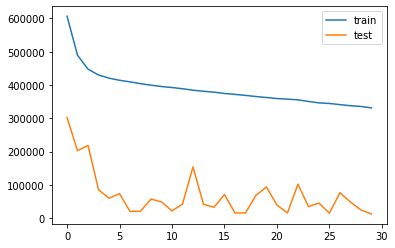

In [ ]:
# train autoencoder for classification with with compression in the bottleneck layer
#https://machinelearningmastery.com/autoencoder-for-classification/
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
# define dataset
X_train = train_target
X_cv = cv_target
# number of input columns
n_inputs = X_train.shape[1]
# split into train test sets


# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = 10
bottleneck = Dense(n_bottleneck)(e)

# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)

# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=30, batch_size=16, verbose=2, validation_data=(X_cv,X_cv))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
# save the encoder to file
encoder.save('mice_encoder.h5')

In [ ]:
X_test.to_csv(index=False)

"id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id\n71488,0.0,2011-04-13,Government Of Tanzania,0,Government,33.14290805,-8.63559971,Sekondari,0,Lake Rukwa,Mlimani,Mbeya,12,1,Chunya,Kanga,0,True,GeoData Consultants Ltd,VWC,,True,0,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,71488\n11295,0.0,2011-03-18,Rc,2050,RC,34.58349935,-9.2929663,Elieza Nziku,0,Rufiji,Mgongoti,Iringa,11,4,Njombe,Igosi,20,True,GeoData Consultants Ltd,VWC,Samaria,True,2006,gravity,gravity,gr

In [ ]:
X_test.to_csv('/content/sample_data/X_test.csv')  

In [ ]:
from tensorflow.keras.models import load_model
encoder = load_model('mice_encoder.h5')

In [ ]:
# encoding the train data
print('='*20+'Train Data'+'='*20)
X_train_encode = encoder.predict(train_target)
print(X_train_encode.shape)
X_train_final = np.hstack((np.array(train_data),X_train_encode))
print(X_train_final.shape)
y_train_final = y_train
print(y_train_final.shape)

#encoding test data
print('='*20+'Test Data'+'='*20)
X_test_encode = encoder.predict(cv_target)
print(X_test_encode.shape)
X_test_final = np.hstack((np.array(test_data),X_test_encode))
print(X_test_final.shape)
y_test_final = y_test
print(y_test_final.shape)

====================Train Data====================
1485/1485 [==============================] - 2s 1ms/step
(47520, 10)
(47520, 31)
(47520, 1)
====================Test Data====================
372/372 [==============================] - 1s 2ms/step
(11880, 10)
(11880, 31)
(11880, 1)


**Logistic Regression+Target Encoding**

In [ ]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='log', n_jobs=-1, random_state = 42)
alpha = [0.0001 , 0.001 , 0.01, 0.1 , 1, 10 , 100]
params = {'alpha' : alpha}
clf = GridSearchCV(clf, params, cv= 3, scoring='f1_micro',verbose=1,return_train_score=True)
clf.fit(X_train_final,y_train_final)
clf.best_params_

Fitting 3 folds for each of 7 candidates, totalling 21 fits


{'alpha': 100}

In [ ]:
# instantiate the model (using the default parameters)
model = SGDClassifier(loss='log',random_state=42,alpha=100)
# fit the model with data
model.fit(X_train_final, y_train_final)
y_pred = model.predict(X_test_final)
f1_score(y_test_final, y_pred, average='micro')

0.5510101010101011

In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix= metrics.confusion_matrix(y_test_final, y_pred)
print(cnf_matrix)# import the metrics class

[[6105    0  347]
 [ 819    0   44]
 [4124    0  441]]


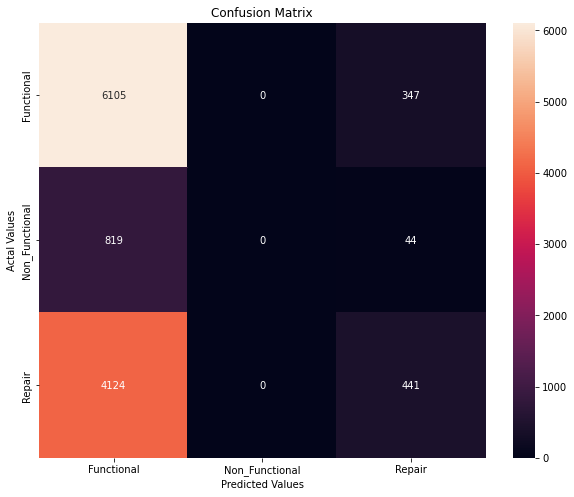

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

**Decision Tree Classifier+Target Encoding**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
params = {'max_depth': [1, 5, 10, 50,100], 'min_samples_split': [5, 10, 100,500,1000]}
clf1 = GridSearchCV(DT, params, cv= 3, scoring='f1_micro',verbose=1,return_train_score=True,n_jobs=-1)
clf1.fit(X_train_final, y_train_final)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50, 100],
                         'min_samples_split': [5, 10, 100, 500, 1000]},
             return_train_score=True, scoring='f1_micro', verbose=1)

In [ ]:
clf1.best_params_

{'max_depth': 50, 'min_samples_split': 100}

In [ ]:
model=DecisionTreeClassifier(max_depth=50,min_samples_split=100)
model.fit(X_train_final, y_train_final)
y_pred = model.predict(X_test_final)

In [ ]:
f1_score(y_test_final, y_pred, average='micro')

0.7135521885521887

https://machinelearningmastery.com/iterative-imputation-for-missing-values-in-machine-learning/
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html
https://github.com/sharathsolomon/scaniaAPSstudy/blob/main/Scania.ipynb

**Random Forest Classifier+Target Encoding**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF = RandomForestClassifier(bootstrap=True)
params = {'n_estimators': [50,100,500,1000],'max_depth':[10,20,50,100]}
clf1 = GridSearchCV(RF, params, cv= 2, scoring='f1_micro',verbose=1,return_train_score=True,n_jobs=-1)
clf1.fit(X_train_final, y_train_final)
pickle.dump(enc,open('enc.pkl','wb'))

Fitting 2 folds for each of 16 candidates, totalling 32 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 50, 100],
                         'n_estimators': [50, 100, 500, 1000]},
             return_train_score=True, scoring='f1_micro', verbose=1)

In [ ]:
clf1.best_params_

{'max_depth': 20, 'n_estimators': 500}

In [ ]:
model=RandomForestClassifier(max_depth=20,n_estimators=500)
pickle.dump(model,open('best_model.pkl','wb'))
model.fit(X_train_final, y_train)
y_pred = model.predict(X_test_final)

In [ ]:
#functional=y_pred[0]
#functional_needs_repair=y_pred[40]
#non_functional=y_pred[1]

In [ ]:
X_test_final

array([[ 0.71666667,  0.72881356,  0.74023246, ..., -1.29145932,
        -0.2146135 , -1.32104075],
       [ 1.27067669,  1.68834036,  0.91293198, ...,  0.62690407,
        -0.49764121, -1.37496781],
       [ 1.23076923,  1.27466503,  0.91703057, ..., -2.21950412,
        -0.12372954,  0.31079549],
       ...,
       [ 0.78949153,  0.78395686,  0.67446211, ...,  0.79420274,
        -0.69982463, -0.09284294],
       [ 1.06386651,  0.8588025 ,  0.91293198, ...,  0.62413007,
        -0.49804676, -1.3773998 ],
       [ 1.10906574,  1.0776699 ,  0.67446211, ..., -0.98755705,
        -0.05525684, -1.60849309]])

In [ ]:
y_pred[40]

1.0

In [ ]:
y_pred[0:100]

array([0., 2., 0., 0., 0., 2., 2., 0., 0., 0., 0., 2., 0., 2., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 2., 0., 0., 0.,
       2., 2., 0., 0., 0., 2., 1., 2., 2., 2., 0., 0., 0., 2., 0., 2., 2.,
       0., 0., 0., 0., 2., 0., 2., 1., 0., 0., 0., 0., 2., 2., 0., 0., 2.,
       0., 2., 0., 2., 1., 0., 0., 0., 0., 0., 0., 2., 0., 1., 2., 0., 0.,
       0., 0., 2., 0., 0., 0., 0., 0., 2., 0., 0., 2., 0., 2., 2.])

In [ ]:
f1_score(y_test, y_pred, average='micro')

0.7868686868686868

In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix= metrics.confusion_matrix(y_test_final, y_pred)
print(cnf_matrix)# import the metrics class

[[5745   53  654]
 [ 565  130  168]
 [1068   24 3473]]


In [ ]:
cm_df = pd.DataFrame(cnf_matrix,index= ['Functional','Non_Functional','Repair'],columns = ['Functional','Non_Functional','Repair'])

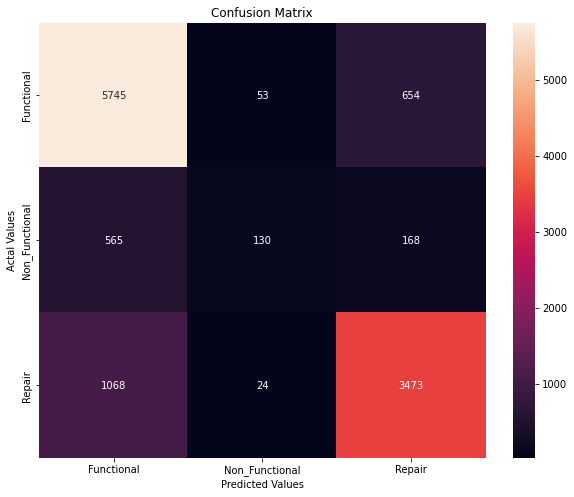

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

**Boosting -LGBM**

In [ ]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
params = {'n_estimators': [50,100, 500, 1000],'max_depth':[10,20,50,100],'num_leaves':[10,20,30,40]}
clf = GridSearchCV(lgbm, params, cv= 2, scoring='f1_micro',verbose=1,return_train_score=True,n_jobs=-1)
clf.fit(X_train_final, y_train_final)

Fitting 2 folds for each of 64 candidates, totalling 128 fits


GridSearchCV(cv=2, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 50, 100],
                         'n_estimators': [50, 100, 500, 1000],
                         'num_leaves': [10, 20, 30, 40]},
             return_train_score=True, scoring='f1_micro', verbose=1)

In [ ]:
clf.best_params_

{'max_depth': 20, 'n_estimators': 500, 'num_leaves': 20}

In [ ]:
model=LGBMClassifier(max_depth=20,n_estimators=500,num_leaves=20)
model.fit(X_train_final, y_train)
y_pred = model.predict(X_test_final)

In [ ]:
f1_score(y_test, y_pred, average='micro')

0.7861952861952863

In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix= metrics.confusion_matrix(y_test_final, y_pred)
print(cnf_matrix)# import the metrics class

[[5940   74  438]
 [ 607  157   99]
 [1277   45 3243]]


In [ ]:
cm_df = pd.DataFrame(cnf_matrix,index= ['Functional','Non_Functional','Repair'],columns = ['Functional','Non_Functional','Repair'])

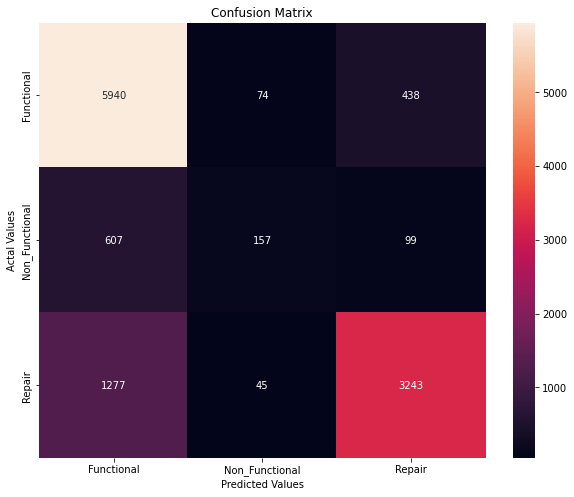

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

**Summary of Models**

In [ ]:
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model","F1_Micro_Score"]

x.add_row(["Logistic Regression+one hot encoding", 0.769])
x.add_row(["Decision Tree+one hot encoding",0.786])
x.add_row(["Random Forest+one hot encoding",0.799])
x.add_row(["LGBM+one hot encoding", 0.788])
x.add_row(["Logistic Regression+Target encoding+Auto Encoder features", 0.551])
x.add_row(["Decision Tree+Target encoding+Auto Encoder features",0.713])
x.add_row(["Random Forest+Target encoding+Auto Encoder features",0.786])
x.add_row(["LGBM+Target encoding+Auto Encoder features", 0.786])
print(x)

+-----------------------------------------------------------+----------------+
|                           Model                           | F1_Micro_Score |
+-----------------------------------------------------------+----------------+
|            Logistic Regression+one hot encoding           |     0.769      |
|               Decision Tree+one hot encoding              |     0.786      |
|               Random Forest+one hot encoding              |     0.799      |
|                   LGBM+one hot encoding                   |     0.788      |
| Logistic Regression+Target encoding+Auto Encoder features |     0.551      |
|    Decision Tree+Target encoding+Auto Encoder features    |     0.713      |
|    Random Forest+Target encoding+Auto Encoder features    |     0.786      |
|         LGBM+Target encoding+Auto Encoder features        |     0.786      |
+-----------------------------------------------------------+----------------+


**Conclusion:**

Random Forest Clasifier with one hot encoding performed good.